In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_excel(path):
    return pd.read_excel(path)

In [3]:
path_1 = '../Data/Preprocessing/Data Losarang/2023/3_lhrt_losarang_2023.xlsx'

df = read_excel(path_1)
df.head()

,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,Friday,00:00,195,259,401,156,259,1004,1418
1,Friday,01:00,169,239,357,135,239,892,1266
2,Friday,02:00,151,224,312,122,224,782,1125
3,Friday,03:00,132,213,286,106,213,714,1033
4,Friday,04:00,119,186,273,95,186,684,966


In [4]:
def normalisasi(df, HARI):
    data = df[df['HARI'] == HARI].copy() 
    data.loc[:, 'SMP_zscore'] = (data['SMP'] - data['SMP'].min()) / (data['SMP'].max() - data['SMP'].min())
    return data
    

In [5]:
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [6]:
# List untuk menampung hasil normalisasi
df_list = []

# Iterasi untuk setiap hari dan normalisasi data
for day in day_names:
    df_normalized = normalisasi(df, day)
    df_list.append(df_normalized)

# Menggabungkan kembali hasilnya menjadi satu DataFrame
df_result = pd.concat(df_list)

In [7]:
df = df_result.copy()
df.to_excel('../Data/Preprocessing/Data Losarang/2023/4_lhrt_normalisasi_losarang_2023.xlsx', index=False)
df.head(48)

,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP,SMP_zscore
24,Monday,00:00,199,202,172,160,202,431,792,0.139966
25,Monday,01:00,168,181,157,135,181,392,708,0.092749
26,Monday,02:00,144,165,144,115,165,358,638,0.053401
27,Monday,03:00,127,150,141,101,150,354,605,0.034851
28,Monday,04:00,132,136,121,106,136,301,543,0.000000
29,Monday,05:00,265,154,125,212,154,312,679,0.076447
30,Monday,06:00,766,221,196,613,221,488,1323,0.438449
31,Monday,07:00,1016,270,188,813,270,471,1554,0.568297
32,Monday,08:00,822,266,172,657,266,429,1354,0.455874
33,Monday,09:00,790,266,148,632,266,369,1267,0.406970


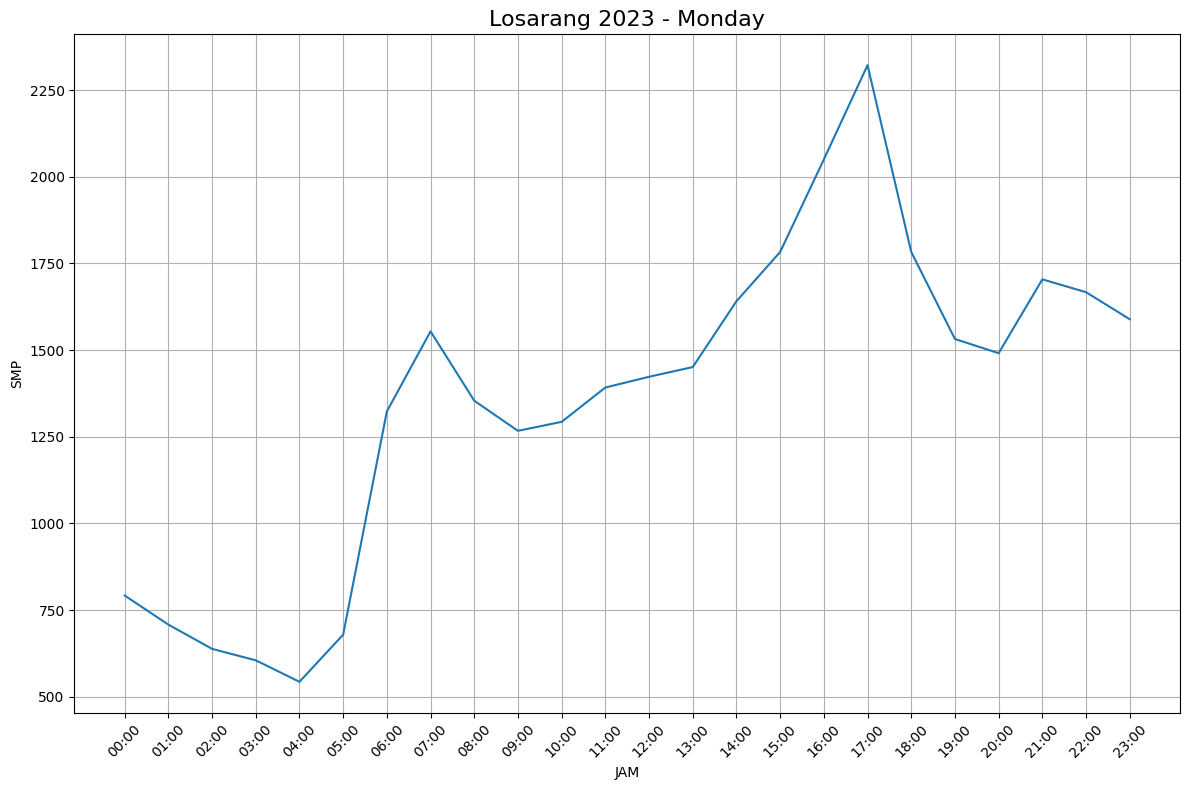

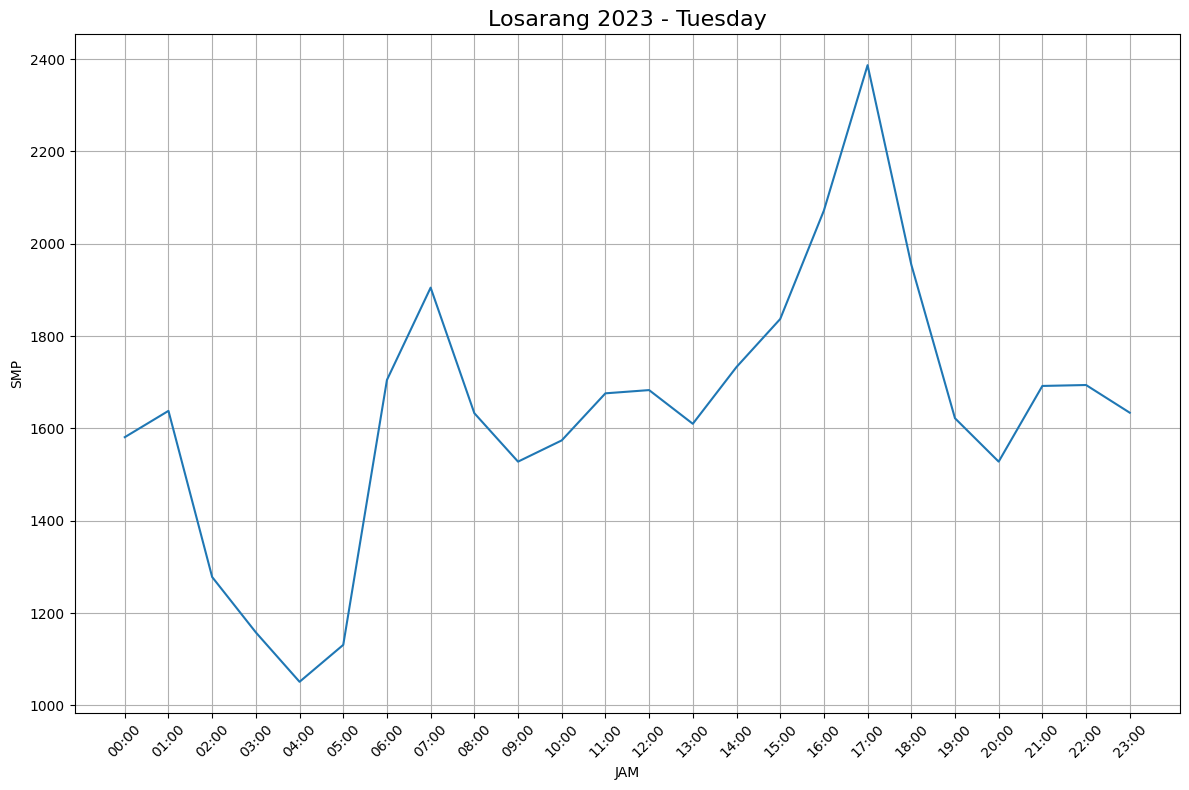

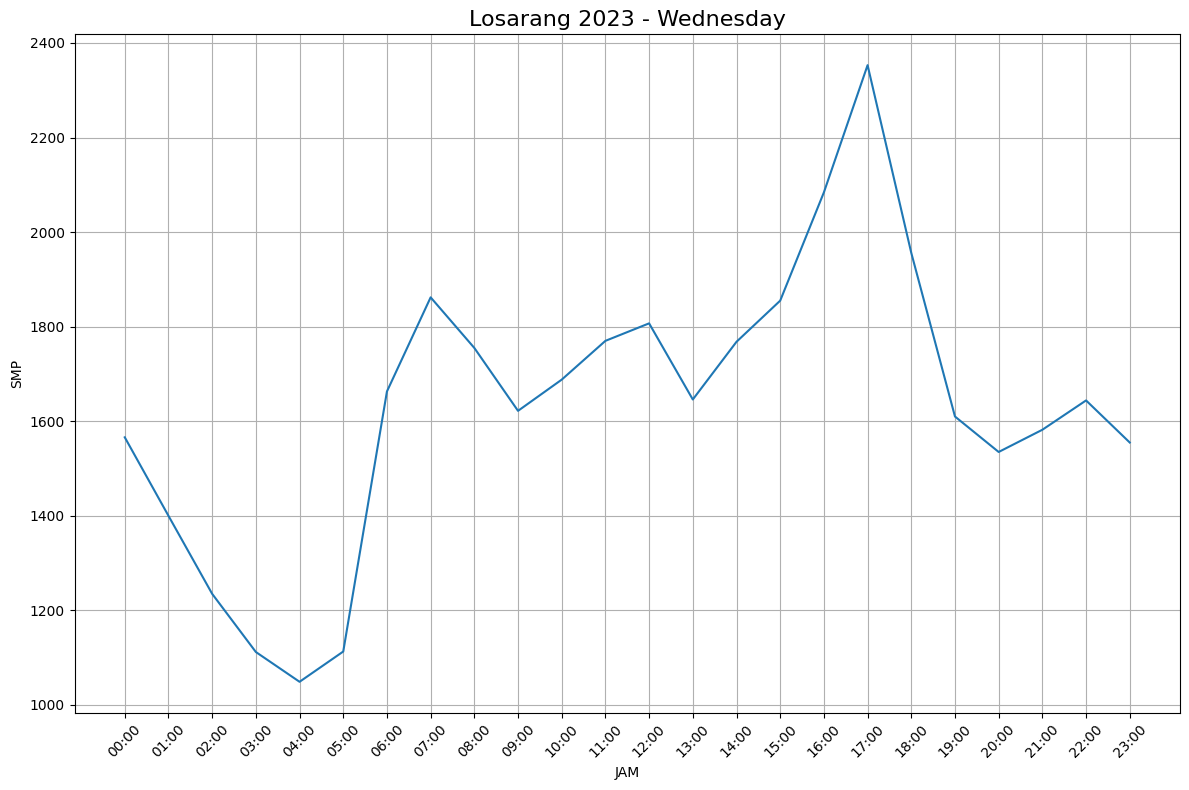

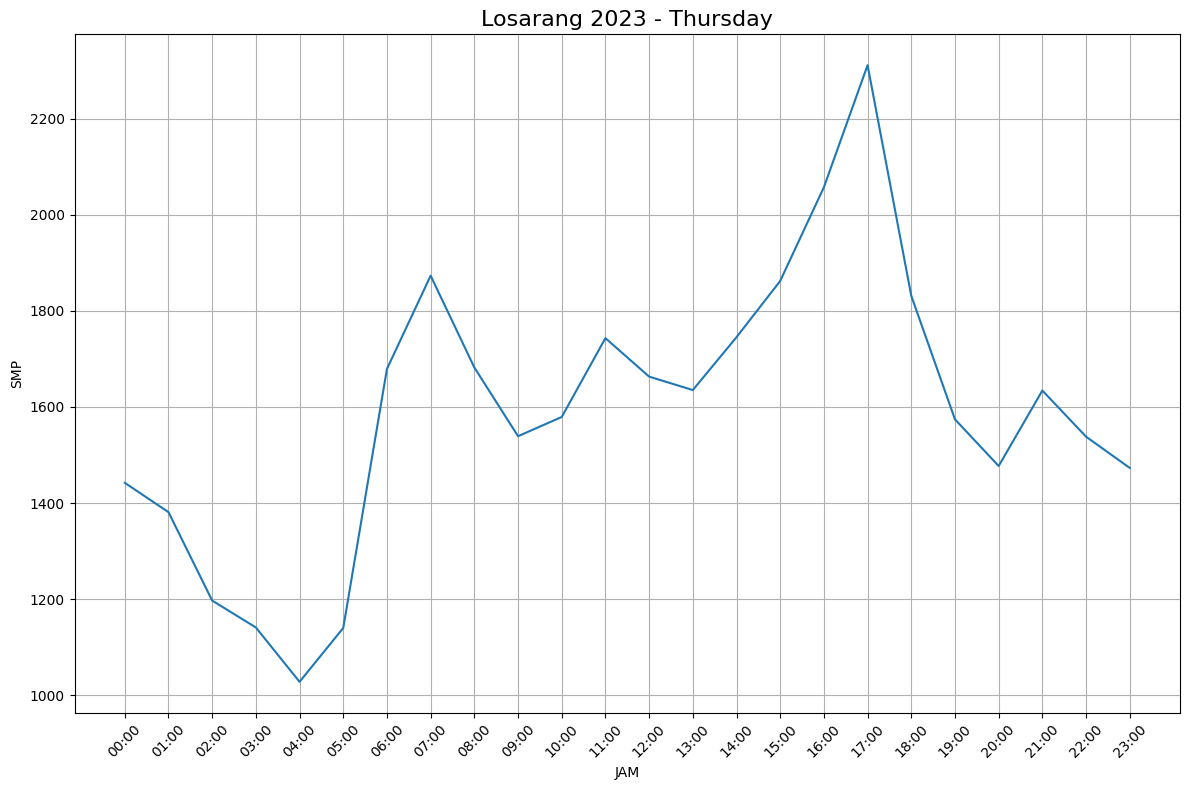

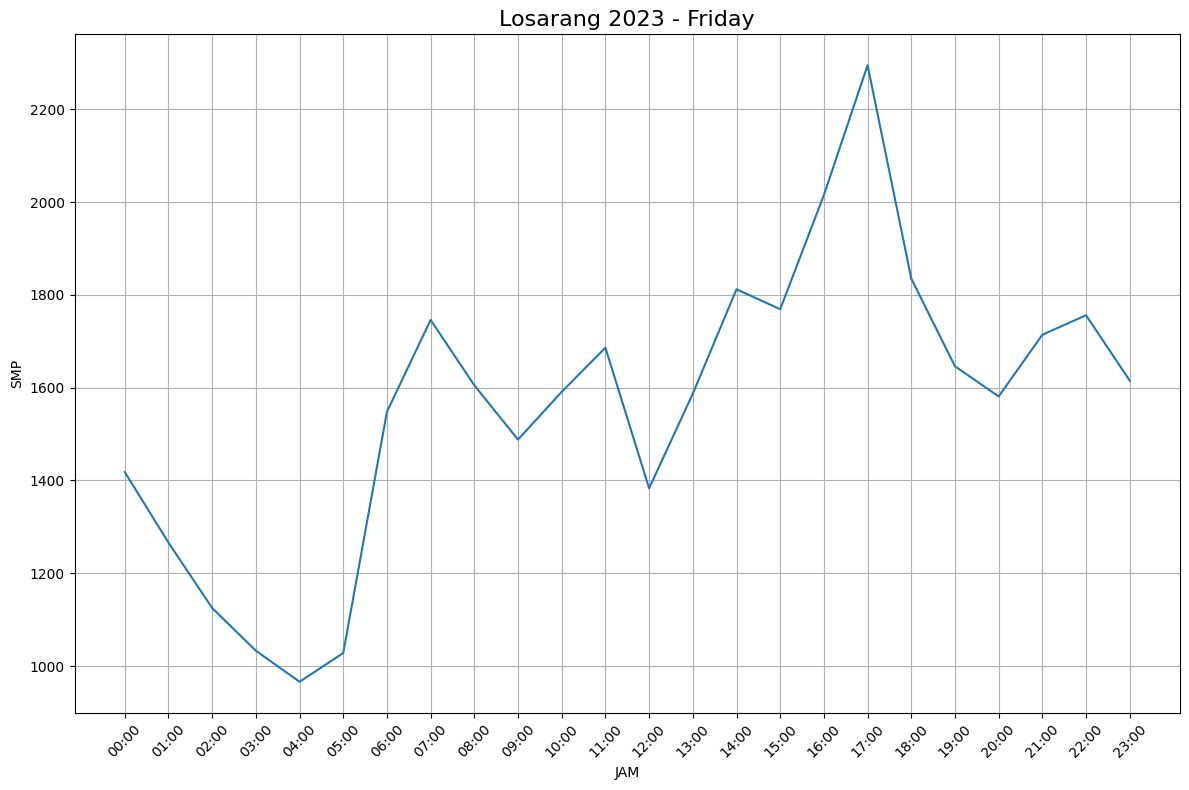

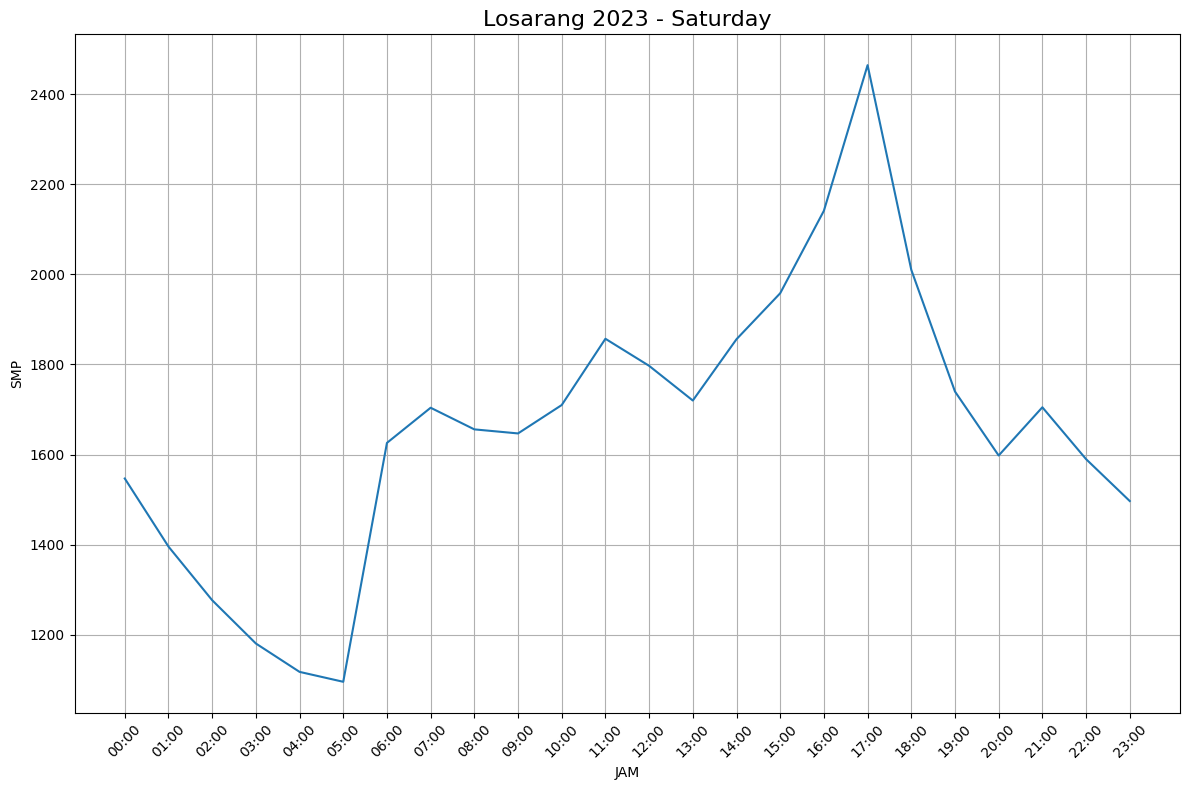

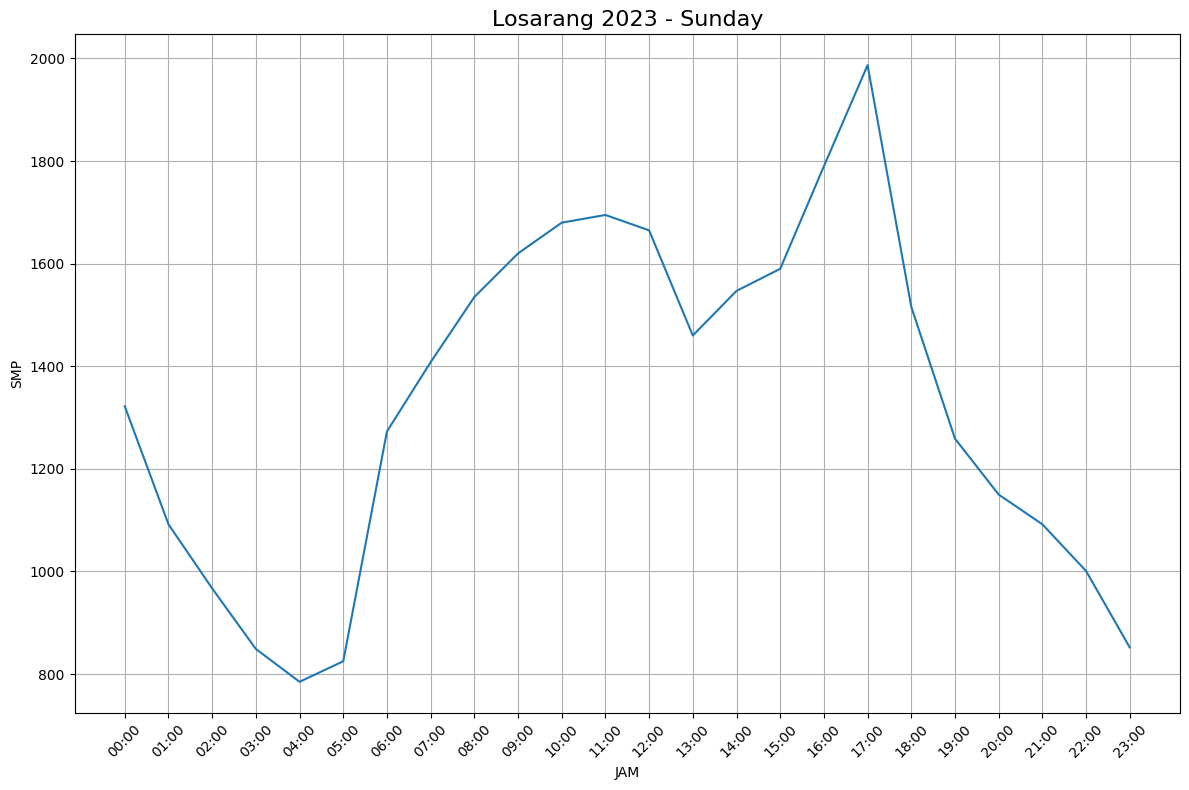

In [8]:
# Urutkan hari secara berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)

# Iterasi melalui hari dan plot setiap hari
for i, hari in enumerate(urutan_hari):
    fig = plt.subplots(figsize=(12, 8))
    data_harian = df[df['HARI'] == hari]  # Filter data per hari
    sns.lineplot(x=data_harian['JAM'], y=data_harian['SMP'])
    plt.title('Losarang 2023 - ' + hari, fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('../Data/Visualisasi/Losarang/2023/4_'+str(i+1)+'_'+hari+'_losarang_2023.png')
    plt.show()

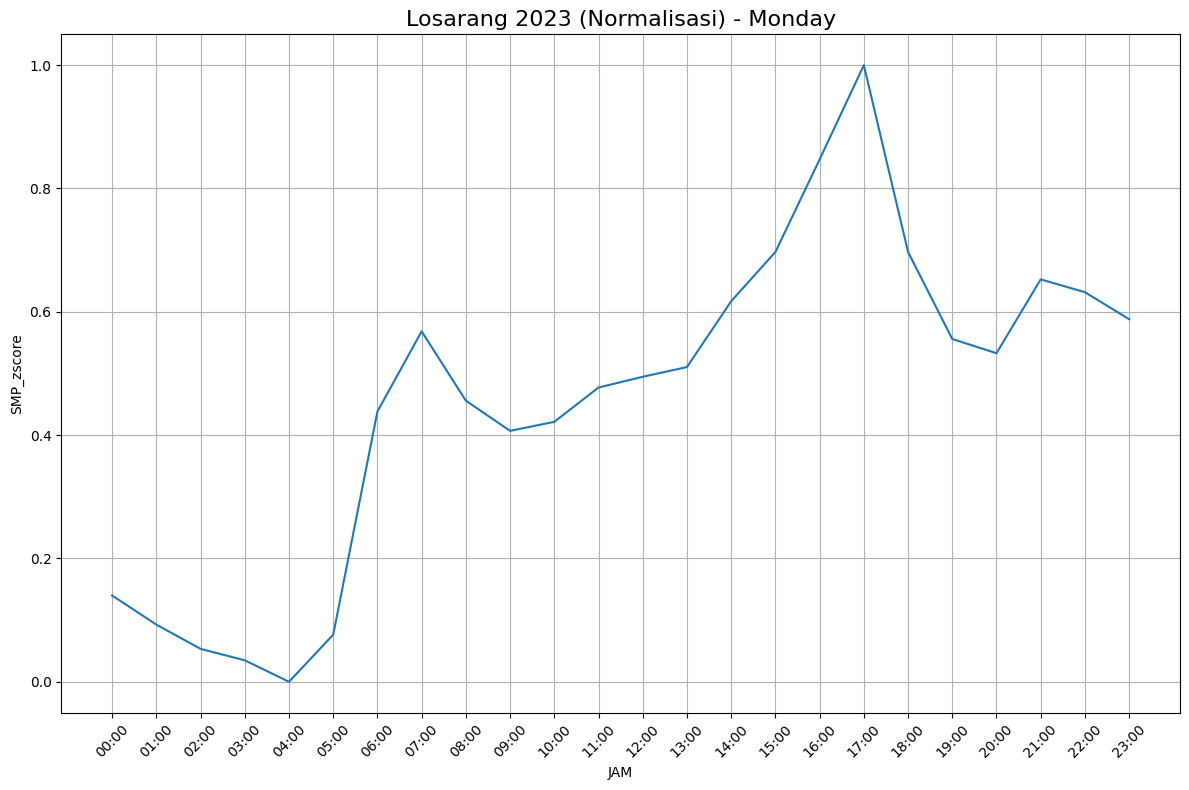

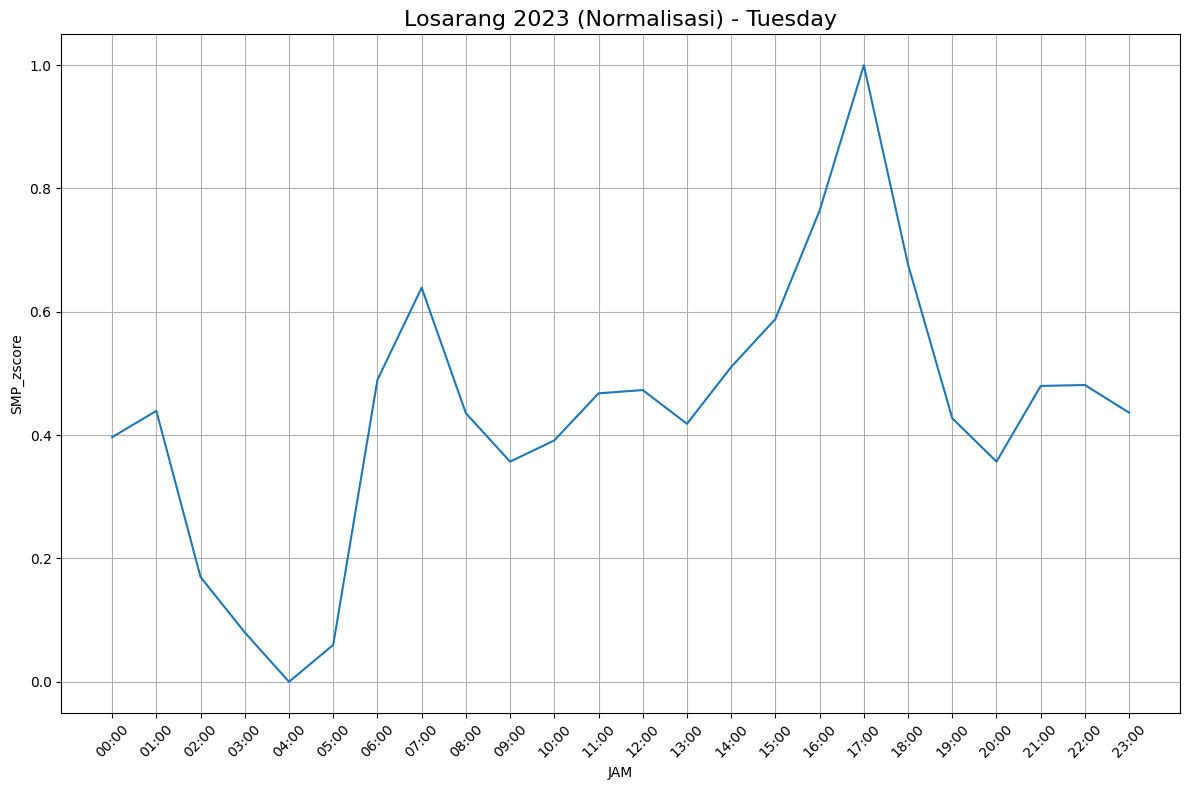

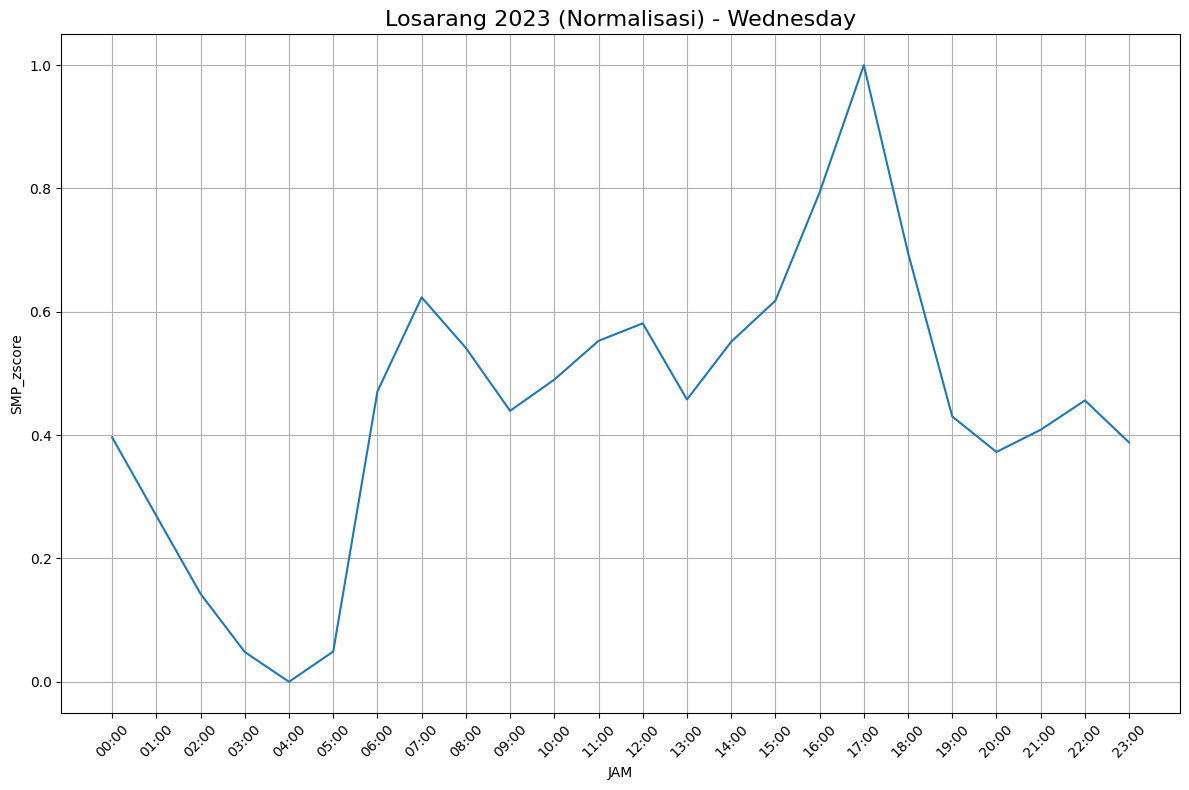

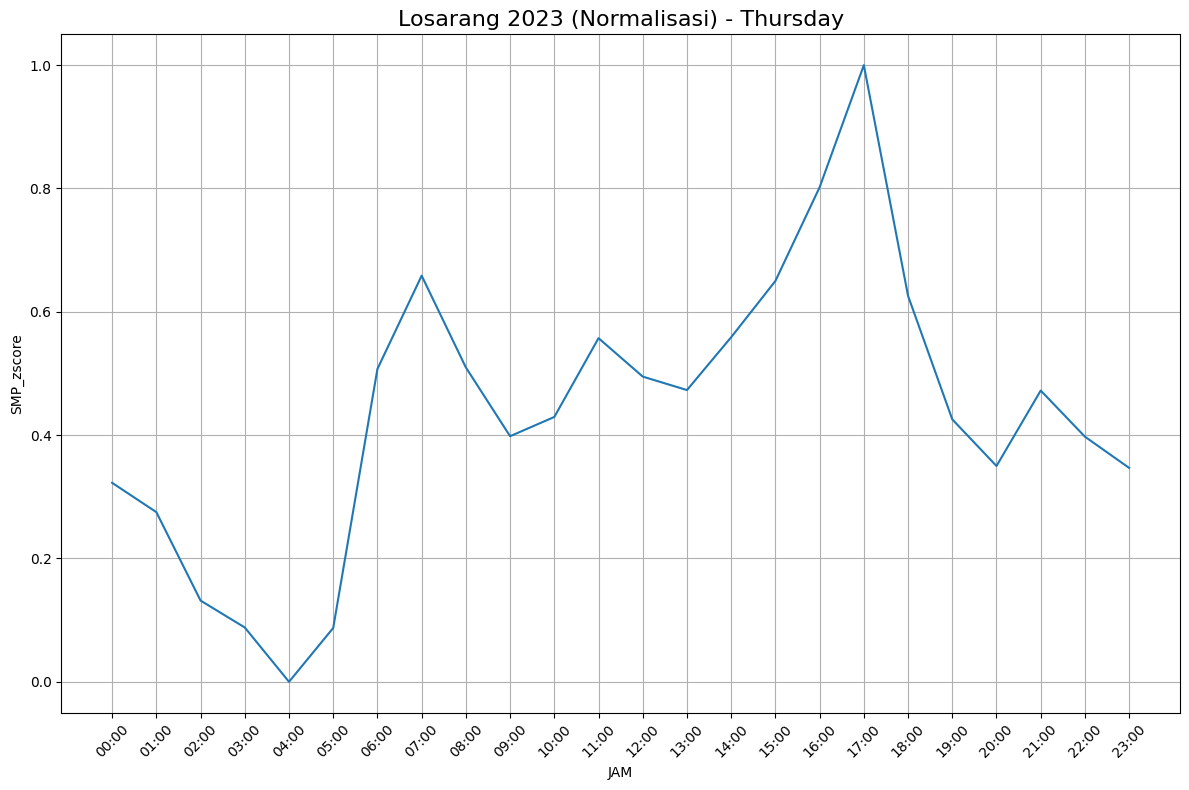

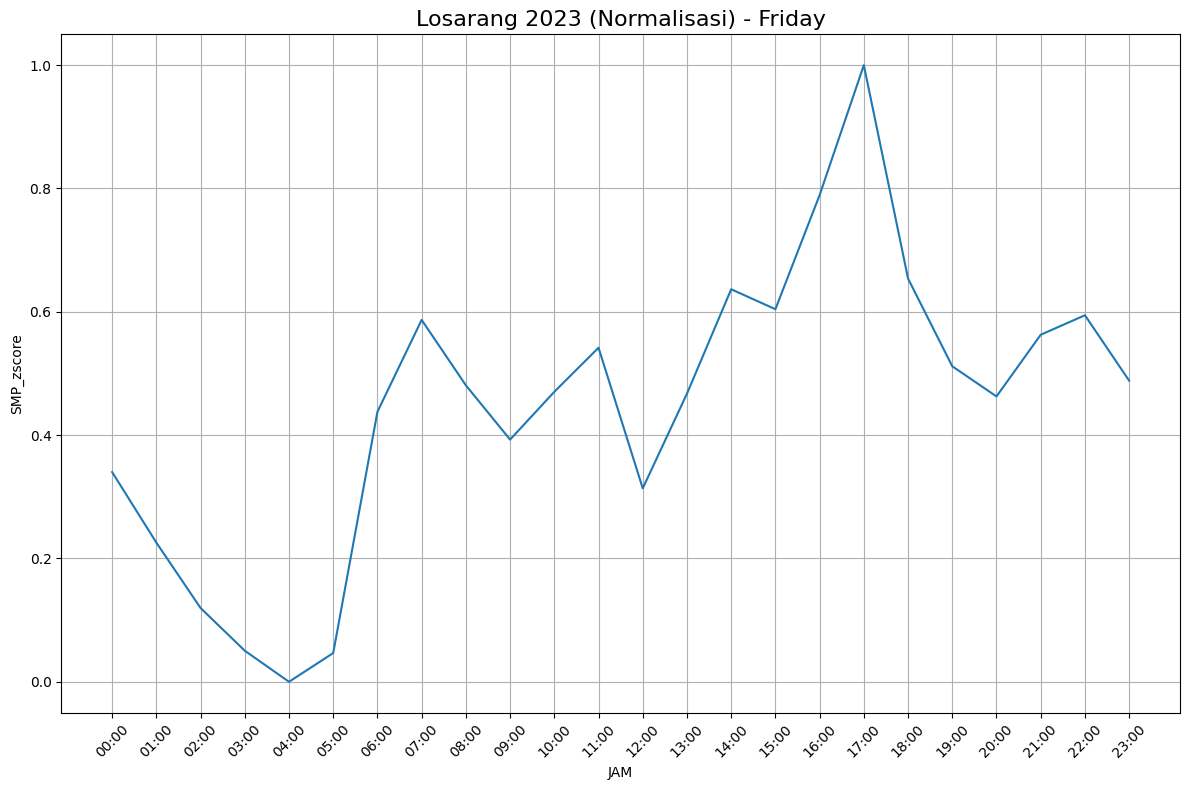

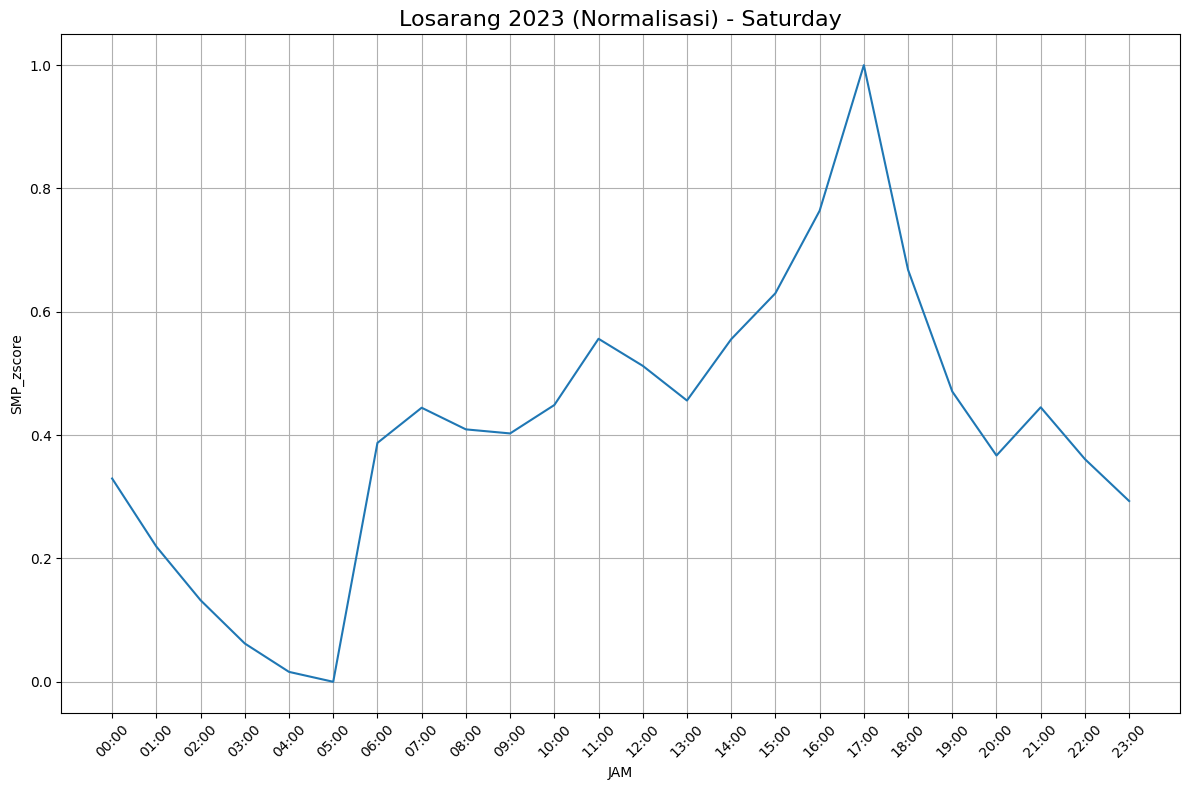

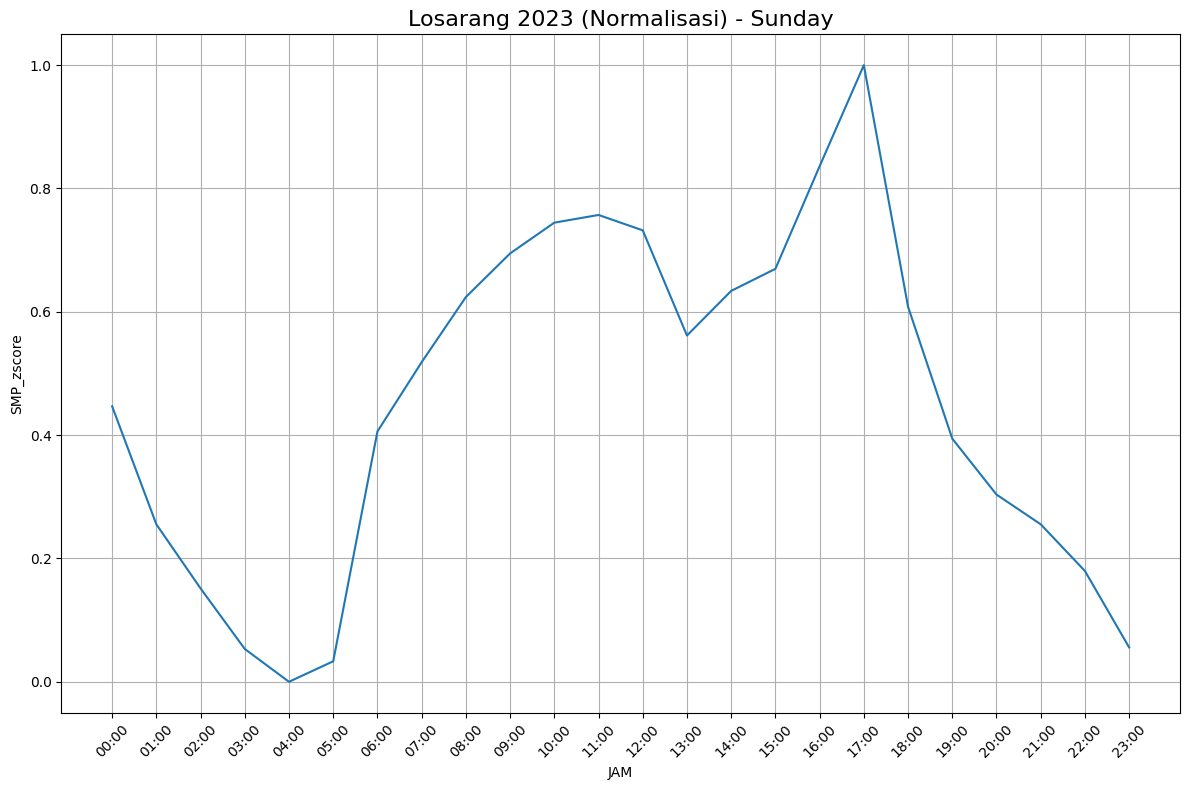

In [9]:
# Urutkan hari secara berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)

# Iterasi melalui hari dan plot setiap hari
for i, hari in enumerate(urutan_hari):
    fig = plt.subplots(figsize=(12, 8))
    data_harian = df[df['HARI'] == hari]  # Filter data per hari
    sns.lineplot(x=data_harian['JAM'], y=data_harian['SMP_zscore'])
    plt.title('Losarang 2023 (Normalisasi) - ' + hari, fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.savefig('../Data/Visualisasi/Losarang/2023/4_'+str(i+1)+'_'+hari+'_normalisasi_losarang_2023.png')
    plt.show()

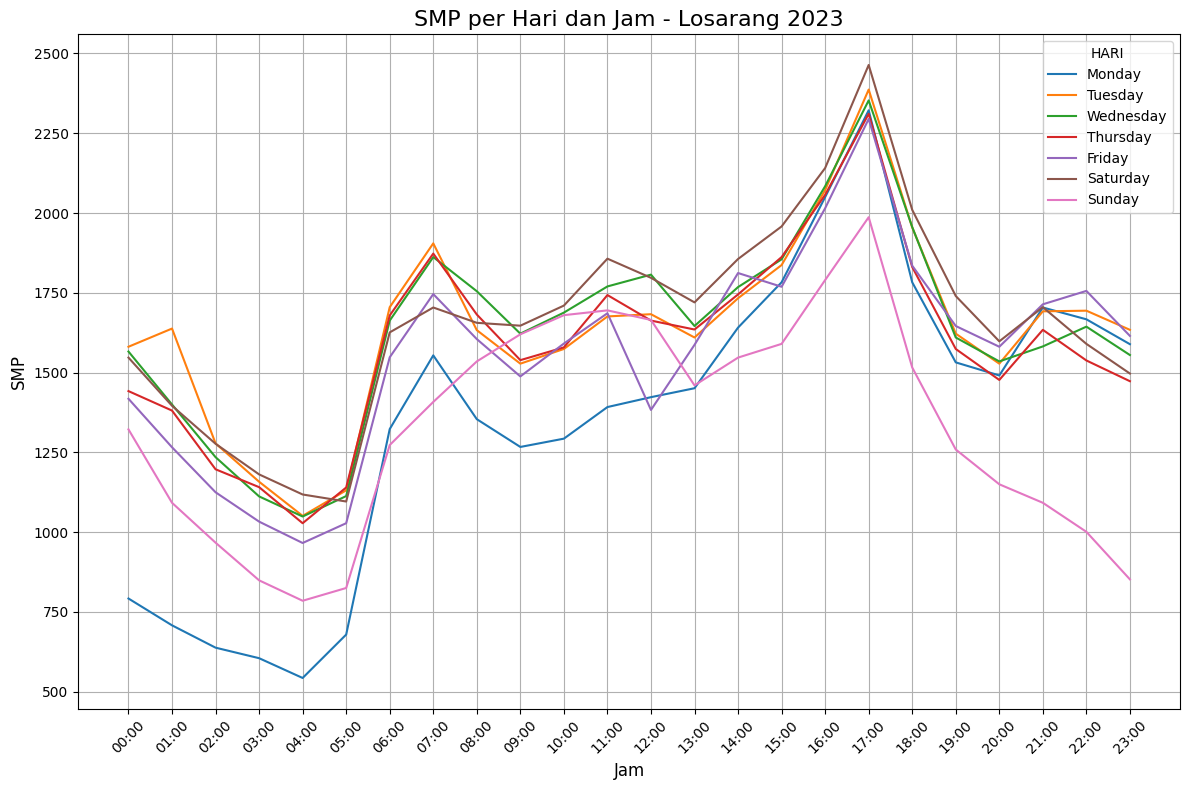

In [10]:
# Ubah 'JAM' menjadi tipe waktu dan 'HARI' menjadi kategori berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)
# df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M').dt.time

# Membuat visualisasi menggunakan Seaborn lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['JAM'].astype(str), y=df['SMP'], hue=df['HARI'])

# Menambahkan label dan judul
plt.title('SMP per Hari dan Jam - Losarang 2023', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('SMP', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Losarang/2023/4_harian_losarang_2023.png')
plt.show()

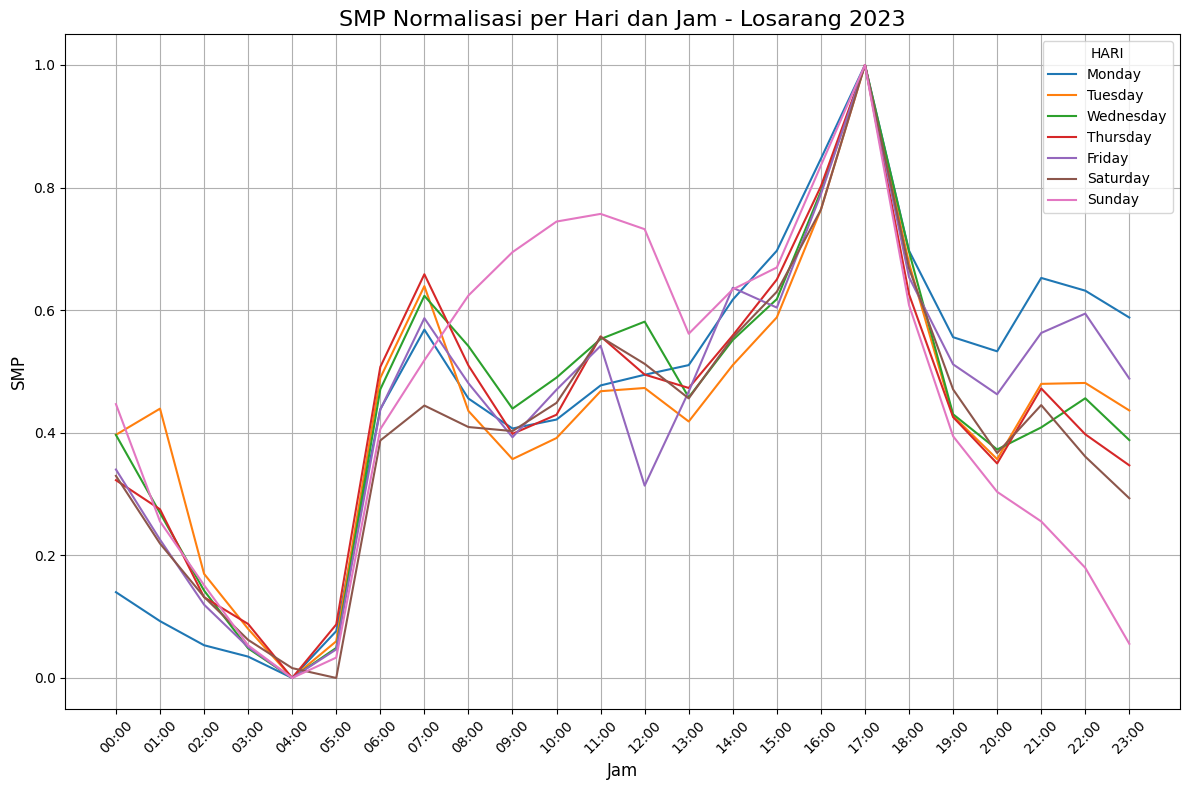

In [11]:
# Ubah 'JAM' menjadi tipe waktu dan 'HARI' menjadi kategori berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)
# df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M').dt.time

# Membuat visualisasi menggunakan Seaborn lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['JAM'].astype(str), y=df['SMP_zscore'], hue=df['HARI'])

# Menambahkan label dan judul
plt.title('SMP Normalisasi per Hari dan Jam - Losarang 2023', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('SMP', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Losarang/2023/4_harian_normalisasi_losarang_2023.png')
plt.show()